In [22]:
from multiprocessing import Pool
import numpy as np
from scipy.stats.qmc import discrepancy

dimension = 2
k = 32
database_size = 2048 * 2
database = np.random.uniform(0, 1, size=(dimension, database_size))

np.random.seed(1)

fmin = float("inf")
subset_min = None

mu = 100
lambda_ = 200
max_g = 1
parents = np.array([
    np.random.choice(database_size, k, False)
    for _ in range(mu)
])
fitness = np.array([discrepancy(database[:, x].T, method="L2-star") for x in parents])

def sample_unique(p, amin = 0, amax = database_size):
    x = np.random.randint(amin, amax)
    while x in p:
        x = np.random.randint(amin, amax)
    return x

def make_unique(v):
    keys, counts = np.unique(v, return_counts=True)
    for key in keys[counts > 1]:
        for idx in np.where(v == key)[0][1:]:
            v[idx] = sample_unique(v)
    return v

def create_offspring(x):
    print(x)
    p, parents = x
    p1, p2 = np.random.choice(mu, size=2, replace=False, p=p)    
    cp = np.random.choice(k)
    off = make_unique(np.r_[parents[p1, :cp], parents[p2, cp:]])
    off[np.random.choice(k)] = sample_unique(off)
    f = discrepancy(database[:, off].T, method="L2-star")
    return off, f

pool = Pool(32)

for g in range(max_g):
    p = fitness / np.sum(fitness)
    offspring = np.zeros((lambda_, k), dtype=int)
    offspring_fitness = np.zeros(lambda_)
    pool.map(create_offspring, map(lambda x: (p, parents), range(lambda_)))
    res = pool.join()
    print(res)  
    # for i in range(lambda_):
    #     offspring[i],  offspring_fitness[i] = create_offspring(p, parents)
        
    # parents = np.vstack([parents, offspring])
    # fitness = np.r_[fitness, offspring_fitness]
    # idx = np.argsort(fitness)[:mu]
    # fitness = fitness[idx]
    # parents = parents[idx, :]
    
    # if fmin > fitness[0]:
    #     fmin = fitness[0]
    #     subset_min = parents[0]
    #     assert len(set(subset_min)) == k
    #     print(g, np.log10(fmin))
        
pool.close()
    

(array([0.00569962, 0.009216  , 0.00842307, 0.00792979, 0.00511611,
       0.00782501, 0.0117203 , 0.00932461, 0.01028649, 0.0067271 ,
       0.00846971, 0.0100118 , 0.00948179, 0.01546088, 0.00852621,
       0.00633596, 0.00713859, 0.00684227, 0.00902225, 0.00985071,
       0.01242479, 0.01416964, 0.00715745, 0.00731422, 0.01037366,
       0.01353172, 0.0106288 , 0.01044235, 0.00724194, 0.00800061,
       0.00764174, 0.00949349, 0.01101719, 0.00792588, 0.01580107,
       0.00906396, 0.0180813 , 0.0107548 , 0.00728699, 0.01443149,
       0.00845284, 0.00718601, 0.00879932, 0.01331879, 0.00885017,
       0.00839921, 0.01061943, 0.00706497, 0.01015909, 0.0122124 ,
       0.00682153, 0.00995183, 0.0079889 , 0.01676777, 0.01544591,
       0.00910431, 0.00791949, 0.00638964, 0.01333953, 0.01085724,
       0.01704979, 0.01495289, 0.0106706 , 0.00726648, 0.01113447,
       0.00891091, 0.00960669, 0.00915036, 0.00662066, 0.0075432 ,
       0.01165945, 0.00866666, 0.01115333, 0.01044062, 0.0110

ValueError: Pool is still running

(array([0.00569962, 0.009216  , 0.00842307, 0.00792979, 0.00511611,
       0.00782501, 0.0117203 , 0.00932461, 0.01028649, 0.0067271 ,
       0.00846971, 0.0100118 , 0.00948179, 0.01546088, 0.00852621,
       0.00633596, 0.00713859, 0.00684227, 0.00902225, 0.00985071,
       0.01242479, 0.01416964, 0.00715745, 0.00731422, 0.01037366,
       0.01353172, 0.0106288 , 0.01044235, 0.00724194, 0.00800061,
       0.00764174, 0.00949349, 0.01101719, 0.00792588, 0.01580107,
       0.00906396, 0.0180813 , 0.0107548 , 0.00728699, 0.01443149,
       0.00845284, 0.00718601, 0.00879932, 0.01331879, 0.00885017,
       0.00839921, 0.01061943, 0.00706497, 0.01015909, 0.0122124 ,
       0.00682153, 0.00995183, 0.0079889 , 0.01676777, 0.01544591,
       0.00910431, 0.00791949, 0.00638964, 0.01333953, 0.01085724,
       0.01704979, 0.01495289, 0.0106706 , 0.00726648, 0.01113447,
       0.00891091, 0.00960669, 0.00915036, 0.00662066, 0.0075432 ,
       0.01165945, 0.00866666, 0.01115333, 0.01044062, 0.0110


(array([0.00569962, 0.009216  , 0.00842307, 0.00792979, 0.00511611,
       0.00782501, 0.0117203 , 0.00932461, 0.01028649, 0.0067271 ,
       0.00846971, 0.0100118 , 0.00948179, 0.01546088, 0.00852621,
       0.00633596, 0.00713859, 0.00684227, 0.00902225, 0.00985071,
       0.01242479, 0.01416964, 0.00715745, 0.00731422, 0.01037366,
       0.01353172, 0.0106288 , 0.01044235, 0.00724194, 0.00800061,
       0.00764174, 0.00949349, 0.01101719, 0.00792588, 0.01580107,
       0.00906396, 0.0180813 , 0.0107548 , 0.00728699, 0.01443149,
       0.00845284, 0.00718601, 0.00879932, 0.01331879, 0.00885017,
       0.00839921, 0.01061943, 0.00706497, 0.01015909, 0.0122124 ,
       0.00682153, 0.00995183, 0.0079889 , 0.01676777, 0.01544591,
       0.00910431, 0.00791949, 0.00638964, 0.01333953, 0.01085724,
       0.01704979, 0.01495289, 0.0106706 , 0.00726648, 0.01113447,
       0.00891091, 0.00960669, 0.00915036, 0.00662066, 0.0075432 ,
       0.01165945, 0.00866666, 0.01115333, 0.01044062, 0.011

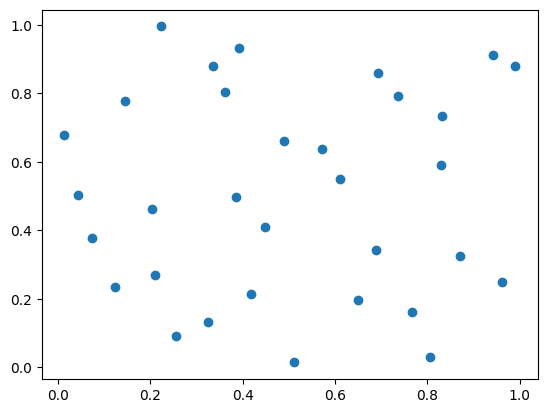

In [3]:
import matplotlib.pyplot as plt
plt.scatter(*database[:, subset_min])